# **List Of Contents:** 
</b>

1. Background
2. Main Problem
3. Metadata
4. Data Understanding
5. Data Cleaning
6. Feature Engineering
7. Final Data
8. Data Analysis
9. Conclusion
10. Recommendation

# Background

Bangkok is one of the most popular tourist destinations globally, known for its vibrant street life, cultural landmarks, and bustling markets. It attracts 22.78 million international visitors in 2023 who come to experience its rich history, delicious cuisine, and diverse attractions. The huge size of tourist coming into Bangkok has certainly creates a high demand for accommodations among tourist, and Airbnb has become one of the top choice as a means to stay periodically for tourist.

Airbnb has become an increasingly popular choice in Bangkok as an alternative accommodation option for tourists. Since it offers a wide range of choices from budget-friendly rooms to luxurious apartments, providing visitors with more flexibility and unique experiences compared to traditional hotels. According to TravelDailyNews.asia*, Airbnb sees a strong international travel rebound in Thailand, with nights booked growing by almost 240% in 2022 from 2020, with Bangkok as the topmost booked Thai destination on Airbnb in 2022.

Although the United States, the United Kingdom, and Europe rank as some of the top countries of origin for Airbnb guests, Asian countries like China and South Korea are also some of the countries that have high interest in visiting Thailand. It has become evident since Thailand ranked as the topmost searched outbound destination amongst guests from China on Airbnb on the day of the government's announcement to lift inbound quarantine requirements in 2022. Furthermore, it has been found that travelers are staying for longer as more global travelers enjoy greater flexibility in work and travel in the post-Covid period. Notably, Airbnb has also co-launched a Live and Work from Anywhere digital guide to support the growth of digital nomads in Thailand with the Tourism Authority of Thailand.

Analyzing the popularity of Airbnb listings based on the number of reviews in Bangkok can be beneficial for stakeholders like Airbnb owners and Airbnb as a company. By understanding which listings attract more reviews, owners can optimize their properties to meet guest expectations, leading to higher occupancy rates and better revenue. For Airbnb as a company, analyzing review data can provide insights into customer satisfaction, areas for improvement, and overall market trends, helping them tailor their services to better serve both hosts and guests. The findings on this analysis can also then be apply to other cities that has similar characteristics as Thailand such as Kuala Lumpur, Ho Chi Minh City, Manila to further plan airbnb expansion in those similar cities.

Specifically for this data analysis, the focus will be more for the hosts and how they can further maximize their strategy. A higher number of reviews would make the host's listings more discoverable from the search bar and also create a sense of trust among the potential bookers that hopefully will turn into a higher number of bookings. Not only that, analyzing the price of other listings would also benefit how hosts price their Airbnb and leads to a better pricing strategy that will benefit the hosts and left the customers satisfied. Lastly, analyzing the geographical aspect of the Airbnb listing would create a better understanding as to where hosts should expand their business. The expansion of their business then would not only brings profit to the hosts but also Airbnb as the third party who connects the transaction.

The tourism industry in Bangkok, Thailand, continues to thrive, with Airbnb emerging as a popular choice for accommodations among international travelers. The city's diverse attractions and cultural heritage attract millions of visitors each year, creating a high demand for lodging options. Airbnb's flexible and unique offerings appeal to travelers seeking personalized experiences, leading to significant growth in bookings, particularly in Bangkok. The company has witnessed a substantial increase in nights booked, with Bangkok ranking as the top Thai destination on Airbnb. Moreover, the lifting of inbound quarantine requirements has sparked even greater interest among travelers, including digital nomads, from both Western and Asian countries.


*source:https://www.traveldailynews.asia/statistics-trends/airbnb-sees-strong-international-travel-rebound-in-thailand-nights-booked-grew-by-almost-240-percent-in-2022-from-2020/

# Main Problems

### 1. Popularity Analysis:
- What are the main attributes that differentiate the low review listings number with high review number listings?
- How do various listing attributes correlate with review counts?

### 2. Price Analysis:
- What are the noticable patterns of other features that could correlate to pricing?
- Can we identify pricing trends or patterns among similar listings in different neighborhoods?

### 3. Geographical Expansion Planning:
- How does the distribution of Airbnb listings vary in Bangkok?


# Metadata
#### Feature Description from The Dataset

| Feature | Type | Description |
| --- | --- | --- |
| id | Identifier | Airbnb's unique identifier for each listing |
| name | Identifier | Name of the listing |
| host_id | Identifier | Airbnb's unique identifier for each host or user |
| host_name | Identifier | Name of the host or just the first name of the host |
| neighborhood | Categorical |A list of 50 districts in Bangkok Thailand geocoded using the latitude and the longitude against neighborhoods as defined by open or public digital shapefiles |
| latitude | Coordinate | Uses the World Geodetic System (WGS84) projection for latitude and longitude|
| longitude | Coordinate | Uses the World Geodetic System (WGS84) projection for latitude and longitude|
| room_type | Categorical | Categorical column that describe wether the listing's type is an Entire home or apartment, Private Room, Shared Room, or a Hotel room |
| price | Numerical | Daily price in local currency which is Thailand Baht where 1USD = 36,81THB |
| minimum_nights | Numerical | The minimum number of night stays for the listings |
| number_of_reviews | Numerical | Number of reviews that the listing has |
| last_review | Date | Date of the last review in the listings until the end of 2022|
| calculated_host_listings_count | Numerical | The number of listings the host has in the current scrape in the city/region geography |
| availability_365 | Numerical | avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may not be available because it has been booked by a guest or blocked by the host |
| number_of_reviews_ltm | Numerical | The number of reviews the listing has (in the last 12 months) |

# Data Understanding

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import json
from collections import Counter

from matplotlib import ticker
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal, spearmanr


In [24]:
df = pd.read_csv("Airbnb Listings Bangkok.csv", index_col=0, parse_dates=['last_review'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  last_re

In [26]:
df.describe()

id       host_id      latitude     longitude         price  \
count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   
std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   

       minimum_nights  number_of_reviews                    last_review  \
count    15854.000000       15854.000000                          10064   
mean        15.292355          16.654157  2021-08-30 08:37:49.316375296   
min          1.000000           0.000000            2012-12-15 00:00:00   
25%          1.000000           0.000000            2020-02-20 00:00:00   
50%          1.000000           2.000000            2022-10-24 00:00:00   
75%          7.000000          13.000000            2022-12-08 00:00:00   
max       1125.000000        1224.000000            2022-12-28 00:00:00   
std         50.815020          40.613331                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       10064.000000                    15854.000000      15854.000000   
mean            0.813145                       13.889618        244.378643   
min             0.010000                        1.000000          0.000000   
25%             0.120000                        1.000000        138.000000   
50%             0.435000                        4.000000        309.000000   
75%             1.060000                       13.000000        360.000000   
max            19.130000                      228.000000        365.000000   
std             1.090196                       30.269848        125.843224   

       number_of_reviews_ltm  
count           15854.000000  
mean                3.481519  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 3.000000  
max               325.000000  
std                 8.916937

In [27]:
df.describe(include=object)

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type  
count          15854            15854  
unique            50                4  
top          Vadhana  Entire home/apt  
freq            2153             8912

In [28]:
df.isna().sum()[df.isna().sum()>0]

name                    8
host_name               1
last_review          5790
reviews_per_month    5790
dtype: int64

In [29]:
df.duplicated().sum()

0

> #### Insights:
- In total, there are **15854** records of data with no exact duplicates
- Categorical column such as `room_type` and `neighbourhood` can be improve by changing the data type from object to category
- There is an anomaly in the range of price where the minimum of **`price` is 0**
- There is an anomaly in the range of `minimum_nights` where maximum value of the `minimum_nights` is **1125 nights** (3 years)
- From the feature description, the `availability_365` column is ambiguous since it's impossible to know whether the listing is not available because it has been booked or because it was blocked by the host
- There are 8 empty values in the `name` column, 1 empty value in the `host_name` column, and **5790** empty values in the `last_review` and `reviews_per_month`

# Data Cleaning

>#### Treatments:

It is illogical to have a listing that cost 0 THB and because there's only one value in the `price` column where the price equals to 0, the row will be dropped since it wouldn't skew or significantly change the dataset

In [30]:
df = df.drop(df[df['price']==0].index)

After getting rid of the anomaly, we can see now the minimum value of the price is 278 THB

In [31]:
df[df['price'] == df['price'].min()][['price']]

price
15551    278

There is an anomaly in the range of `minimum_nights` where maximum value of the `minimum_nights` is equal to **1125 nights** (3 years). Rows containing these high numbers of minimum nights will be treated as an outlier instead of being dropped since it didn't interfere with the airbnb terms if the host already aggreed to it (source: https://www.airbnb.ca/help/article/245 ,  https://www.airbnb.co.id/help/article/2584)

In [32]:
df[df['minimum_nights'] == df['minimum_nights'].max()][['minimum_nights']]

minimum_nights
61            1125

The column`availability_365` is too ambiguous, since it's impossible to know wether the listings is not available because it has been booked or because it has been blocked. So it's best to drop it to make fasten the processing process

In [33]:
df = df.drop(columns='availability_365')

To retain information of the listings, the empty values in the `name` and `host_name` column will be filled with unique values as an alias name

In [34]:
fillname = []
num = 1

# iterrating each rows to produce the needed amount of alias names
for index, row in df.iterrows():
    if pd.isnull(row['name']):
        fillname.append(f'unknown_{num}')
        num += 1

fillname = pd.DataFrame({'name': fillname})

df.loc[df['name'].isnull(), 'name'] = fillname['name'].values

Now, all of the empty values in the `name` column are replaced with "unkown_x"

In [35]:
df[df['name'].str.contains('unknown')]

id       name   host_id        host_name neighbourhood  latitude  \
439    4549768  unknown_1  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  unknown_2  24386225           Cherry     Din Daeng  13.77562   
572    4245018  unknown_3  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  unknown_4  31895202            Chira       Bang Na  13.68276   
1030   8055144  unknown_5  42521288          Nantida       Vadhana  13.74126   
1282  10000742  unknown_6  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  unknown_7  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  unknown_8  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   
2075  100.56416     Private room    850               1                  2   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaT                NaN                               1   
544          NaT                NaN                               1   
572          NaT                NaN                               1   
669          NaT                NaN                               1   
1030         NaT                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaT                NaN                               1   
2075  2017-12-11               0.03                               3   

      number_of_reviews_ltm  
439                       0  
544                       0  
572                       0  
669                       0  
1030                      0  
1282                      0  
1594                      0  
2075                      0

Do the same thing with `host_name` column but with only the first value to match the number of null values since it has only one null values

In [36]:
df.loc[df['host_name'].isnull(), 'host_name'] = fillname['name'][0]

Now, all of the empty values in the `host_name` column are replaced with "unkown_x"

In [37]:
df[df['host_name'].str.contains('unknown')]

id           name    host_id  host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762  unknown_1     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      number_of_reviews_ltm  
3571                      0

The next step is to understand how to handle the remaining null values of the column `last_review` and `reviews_per_month`

In [38]:
df.isna().sum()[df.isna().sum()>0]

last_review          5789
reviews_per_month    5789
dtype: int64

Checking if all empty values in last_review and reviews_per_month is in the same index

In [39]:
print("Null values in reviews_per_month have the same index as number_of_reviews_ltm:",
      df['reviews_per_month'].isna().all()==df['number_of_reviews_ltm'].isna().all())
nulls = (df['last_review'].isna())&(df['reviews_per_month'].isna())
print(f"There are {len(df[(df['last_review'].isna())&(df['reviews_per_month'].isna())])} of rows where both last_review and reviews_per_month is null")

Null values in reviews_per_month have the same index as number_of_reviews_ltm: True
There are 5789 of rows where both last_review and reviews_per_month is null


The **5789** null values has the same index in each column which means each null values is **not random** and has meaning or patterns. Since it's possible for each null values to meant no reviews at all or 0 reviews, it is important to check the number of reviews in each rows that contain null values. If all of the rows that contain null values has also 0 number of reviews then it can be confirmed that all of the null values mean that there's no review at all.

In [40]:
result = df[nulls]['number_of_reviews']==0

if result.all():
    print("All NaN values mean 0 number of reviews")
elif result.any():
    print("Only some all NaN values mean 0 number of reviews.")
else:
    print("No NaN values mean 0 number of reviews")

All NaN values mean 0 number of reviews


Since it is confirmed that all of the null values has 0 number of reviews, it is acceptable to fill all the null values in the `reviews_per_month` column with 0 to improve analysis and make statistical testing easier

In [41]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)

The null values in the `last_review` will be left as is because there is no 0 value in date, instead it is easier to calculate review recency by adding a new feature called `days_since_last_review` by calculating the days from the `last_review` date until the end of 2022 since it seems like where the date ends.

In [42]:
end_of_2022 = pd.to_datetime('2022-12-31')
df['days_since_last_review'] = (end_of_2022 - df['last_review']).dt.days

This will be the final data with the null values left as is, since filling the null values with 0 will skew the sorted result of  `days_since_last_review` column. 

In [43]:
df.isna().sum()[df.isna().sum()>0]

last_review               5789
days_since_last_review    5789
dtype: int64

# Feature Engineering

Adding Additional Columns for Analysis:


1. `nearest_station` & `distance_to_station` :
   - Calculates the nearest transit station and the distance to that station for each Airbnb listing in the dataset.
   - `nearest_station`: Represents the name or identifier of the nearest transit station.
   - `distance_to_station`: Indicates the distance (in kilometers) from each listing to its nearest transit station.
   - These columns provide valuable spatial context and information about accessibility, which can influence the attractiveness and desirability of Airbnb listings.

2. `price_class`: 
   - The `price_class` column categorizes the prices of Airbnb listings into five predefined classes based on their quartiles.
   - Allows for better understanding of price distribution and segmentation within the dataset.
   - Facilitates comparison and analysis of listings based on their price classes, enabling hosts to optimize pricing strategies and cater to different customer segments.
    

3. . `distance_to_station_class`: 
   - The `distance_to_station_class` column categorizes the distances of Airbnb listings to the nearest station into three predefined classes based on quartiles.
   - Enables assessment of the accessibility of listings to public transportation, a key factor for many travelers when choosing accommodations.
   - Helps identify listings located in areas with optimal transit access, which may attract more bookings and command premium prices.
   - Allows hosts to highlight proximity to transit hubs as a selling point and target specific customer segments seeking convenient transportation options.

> Adding `nearest_station` & `distance_to_station` 

In [44]:
import geopandas as gpd
from shapely.geometry import Point
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

train_station_gdf = gpd.read_file('BTS__MRT_-_Bangkok_Mass_Transit.geojson')  

train_station_gdf['latitude'] = train_station_gdf.geometry.y
train_station_gdf['longitude'] = train_station_gdf.geometry.x

for index, airbnb_row in df.iterrows():
    min_distance = float('inf')
    nearest_station = None


    for _, station_row in train_station_gdf.iterrows():
        distance = haversine(airbnb_row['latitude'], airbnb_row['longitude'],
                             station_row['latitude'], station_row['longitude'])
        if distance < min_distance:
            min_distance = distance
            nearest_station = station_row['Name']  


    df.at[index, 'nearest_station'] = nearest_station
    df.at[index, 'distance_to_station'] = min_distance



> Adding `price_class` & `distance_to_station_class` 

In [45]:
df['price_class'] = pd.qcut(df['price'], q=5, labels=["Economy","Standard","Quality","Deluxe","Luxury"])
df['distance_to_station_class'] = pd.qcut(df['distance_to_station'], q=3, labels=["Far", "Accessible", "Near"])
df.head()


id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               1                  0         NaT               0.00   
2              60                  0         NaT               0.00   
3               7                  2  2022-04-01               0.03   
4               1                  0         NaT               0.00   

   calculated_host_listings_count  number_of_reviews_ltm  \
0                               2                      0   
1                               2                      0   
2                               1                      0   
3                               1                      1   
4                               3                      0   

   days_since_last_review   nearest_station  distance_to_station price_class  \
0                  1090.0  Victory Monument             0.576150      Deluxe   
1                     NaN            Bangna             1.299375     Quality   
2                     NaN      Phra Khanong             5.433296     Economy   
3                   274.0         Sutthisan             0.184408     Quality   
4                     NaN       Huai Khwang             6.578230      Deluxe   

  distance_to_station_class  
0                Accessible  
1                      Near  
2                      Near  
3                       Far  
4                      Near

In [46]:
price_order = ['Economy', 'Standard', 'Quality', 'Deluxe','Luxury']
ordered_dtype = pd.CategoricalDtype(categories=price_order, ordered=True)
df['price_class'] = df['price_class'].astype(ordered_dtype)
distance_order = ['Near', 'Accessible', 'Far']
ordered_dtype = pd.CategoricalDtype(categories=distance_order, ordered=True)
df['distance_to_station_class'] = df['distance_to_station_class'].astype(ordered_dtype)

# Checking Data Distributions

#### There are many reasons as to why checking the data distribution is important, some of them are listed below:

   1. Detecting Departures from Normality:
      - Conducting normality tests on numerical columns allows us to assess whether the data follows a normal distribution or not. 
      - Identifying departures from normality is crucial for selecting appropriate statistical methods and ensuring the validity of subsequent analyses.
      - If a numerical column significantly deviates from a normal distribution, alternative statistical techniques such as non-parametric tests may will most likely be more suitable for analysis.

   2. Validating Assumptions for Parametric Tests:
      - Many statistical tests, such as t-tests, and ANOVA, rely on the assumption of normality in the underlying data.
      - By performing normality tests, we can validate this assumption and determine whether parametric tests are appropriate for our data.
      - If the data fails the normality test, it may indicate that parametric tests are not valid, and alternative methods like Kruskal-Wallis, Spearman Correlation should be considered.

   3. Identifying Outliers and Anomalies:
      - Normality tests can help in identifying outliers and anomalies in numerical columns.
      - Outliers can significantly impact the results of statistical analyses and machine learning models, leading to biased estimates and reduced predictive accuracy.
      - By detecting outliers early in the exploratory data analysis phase, we can take appropriate steps such as data cleaning or outlier treatment to improve the quality and  reliability of our analyses.


Defining numerical and categorical columns by grouping the column name into variables will make distribution test done easier and faster

In [47]:
# defining numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int','float']).columns[4:].tolist() # not including id and host_id
categorical_columns = df.select_dtypes(include=['object']).columns[2:].tolist()  # not including name and host_name

In [48]:
pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical_columns, numerical_columns]
})

Column Type  \
0  Categorical   
1    Numerical   

                                                                                                                                                             Columns  
0                                                                                                                        [neighbourhood, room_type, nearest_station]  
1  [price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, number_of_reviews_ltm, days_since_last_review, distance_to_station]

Because in the previous section we know that all the categorical columns are in `object` data type, it would need to be converted into `category` data type to make computations faster and to differentiate between the name columns that are justr strings and a categorical columns with a handful of unique values

In [49]:
# to convert the data type from object to category
df[categorical_columns] = df[categorical_columns].astype('category') 

In [50]:
alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical_columns:
    stat, p_value = normaltest(df[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = df[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

Feature  D'Agostino-Pearson Statistic  P-value  \
0                           price                  43046.717756      0.0   
1                  minimum_nights                  22190.129178      0.0   
2               number_of_reviews                  19163.172470      0.0   
3               reviews_per_month                  15621.035696      0.0   
4  calculated_host_listings_count                  16474.501173      0.0   
5           number_of_reviews_ltm                  24895.698981      0.0   
6          days_since_last_review                   1821.235194      0.0   
7             distance_to_station                  11158.181867      0.0   

               Distribution   Skewness Skewness Type  
0  Not Normally Distributed  33.882198    Right Skew  
1  Not Normally Distributed   8.229398    Right Skew  
2  Not Normally Distributed   6.261361    Right Skew  
3  Not Normally Distributed   4.628295    Right Skew  
4  Not Normally Distributed   5.386583    Right Skew  
5  Not Normally Distributed   9.725723    Right Skew  
6  Not Normally Distributed   1.277207    Right Skew  
7  Not Normally Distributed   3.312950    Right Skew

#### Insights from the Normal Distribution Test:

   1. Not Normally Distributed: 
      - All features exhibit a statistically significant departure from normality, as indicated by the p-values being less than 0.05.

   2. Right Skewness:
      - All features demonstrate right skewness, as evidenced by positive skewness values.
      - Right skewness indicates that the distribution is stretched out towards the higher values, with a longer right tail.
      - This skewness pattern is common in numerical features such as `prices` and `counts`, where a few observations have very high values.

   3. Magnitude of Skewness:
      - The skewness values range from moderately skewed to highly skewed, with some features exhibiting extreme skewness (e.g., skewness values exceeding 30 in the `price` column).
      - Features like `price`, `minimum_nights`, `number_of_reviews_ltm`, and `calculated_host_listings_count` have particularly high skewness values, indicating a substantial imbalance towards higher values in their distributions.
      - This is especialy noticable in the `price` feature since the skewness is more than 3 times higher than `number_of_reviews_ltm` which is the second highest.

   4. Potential Impact on Analysis:
      - The non-normal distribution and right skewness of these features may affect the validity of parametric statistical tests that assume normality.
      - Alternative non-parametric tests or data transformations may be more appropriate for analyzing these features to mitigate the influence of skewness and ensure robustness of the analysis.


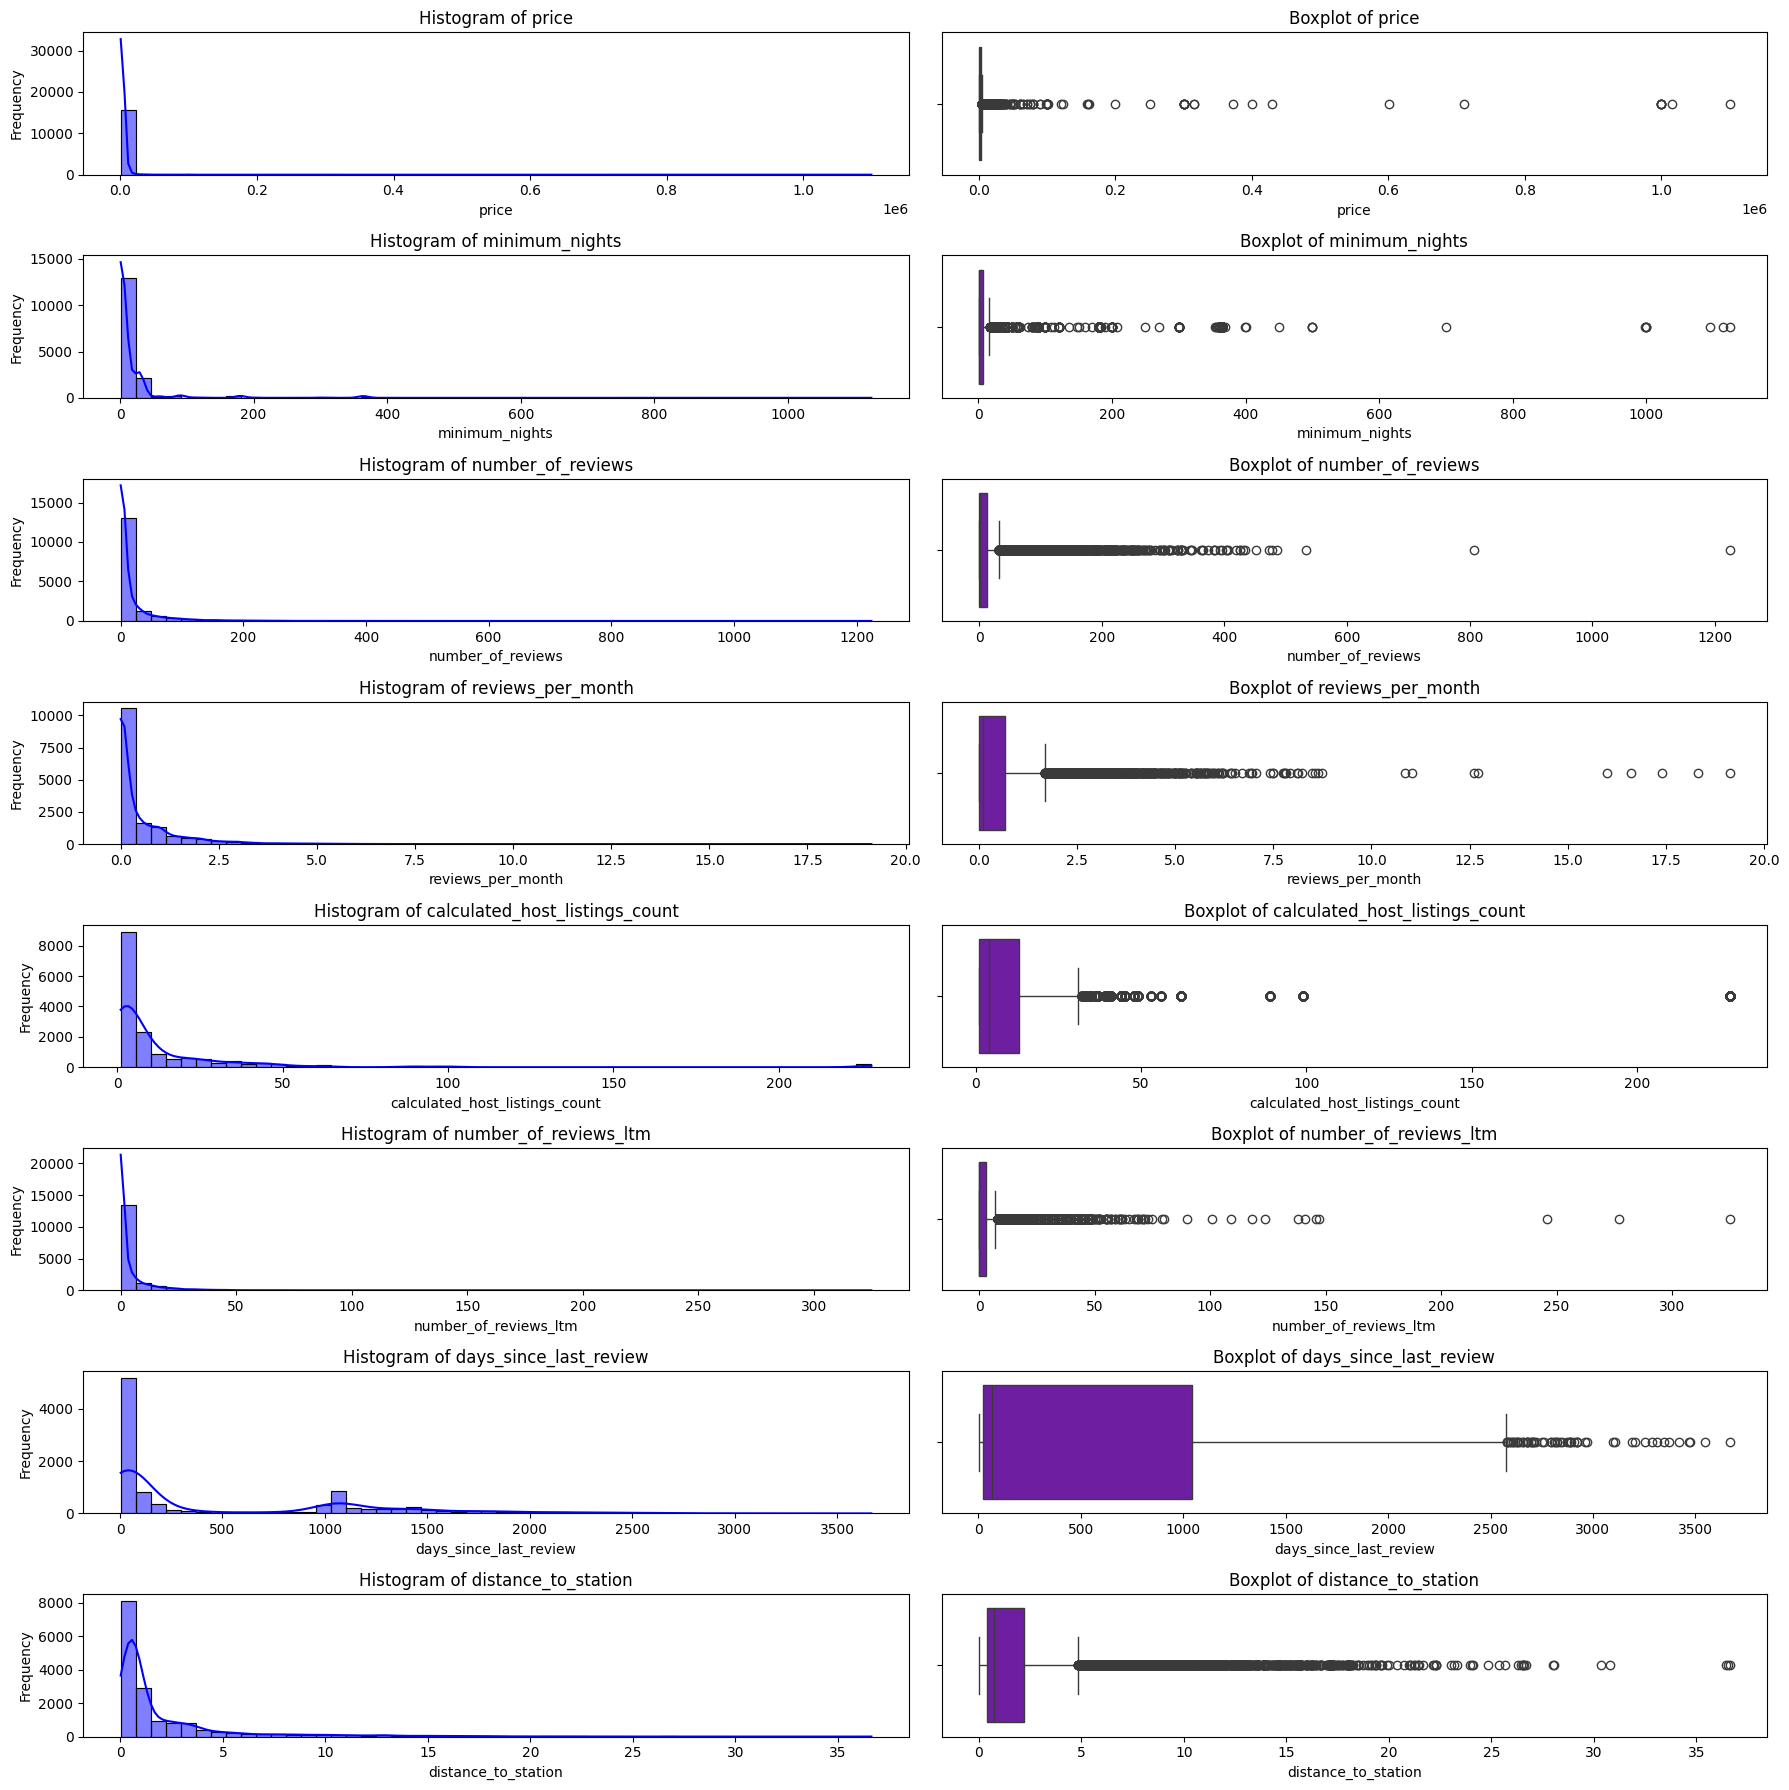

In [51]:
plt.figure(figsize=(18, 18))

for index, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, index * 2 + 1) 
    sns.histplot(df[col], kde=True, color="blue", bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(len(numerical_columns), 2, index * 2 + 2)
    sns.boxplot(x=df[col], color="#7209B7")
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The histograms and boxplots further prove that all of the numerical data are assumed not ditributed normally and skewed to the right, with the `price` feature having the highest skewness.  Not to mention the x axis of both the histogram and boxplot are in scientific notation 1e6 = 10^6 which means it is in a scale of 1 million.


#### Insights from the Histograms and Boxplots:

   1. The Outliers: 
      - The histograms and boxplots further prove that all of the numerical data are assumed not ditributed normally and skewed to the right, with the `price` feature having the highest skewness. This can be concluded as the `price` column having the smallest amount of visible data in the boxplot.
      - From the `price` histogram and boxplot we can also see how only a few numbers of outliers are having the extremely high price points. Which proves the previous assumptions about `price` colums to be true

> #### Because the data is assumed not distributed normally, Interval Quartile Range or IQR is used to see the percentage of the outliers out of all the data

In [52]:
def outlier_percentage(data,column):
    Q1 = data[column].quantile(1/4)
    Q3 = data[column].quantile(3/4)
    iqr = Q3-Q1
    outlier_lower_limit = Q1 - 1.5 * iqr
    outlier_upper_limit = Q3 + 1.5 * iqr
    num_of_outliers = len(data[(data[column]<outlier_lower_limit) | (data[column]>outlier_upper_limit)])
    outlier_percentage = round(num_of_outliers/len(data[column])*100,2)
    return num_of_outliers, outlier_percentage, outlier_lower_limit, outlier_upper_limit
    
outliers = []
   
for i in numerical_columns:
    total_outliers, outliers_percent, lower_bound, upper_bound = outlier_percentage(df,i)
    outliers.append([i, total_outliers, outliers_percent, lower_bound, upper_bound])
    
outliers_info = pd.DataFrame(outliers, columns = ["Columns", "Number of Outliers","(%) of Outliers","Lower bound","Upper bound"])
outliers_info

Columns  Number of Outliers  (%) of Outliers  \
0                           price                1403             8.85   
1                  minimum_nights                3168            19.98   
2               number_of_reviews                2240            14.13   
3               reviews_per_month                1471             9.28   
4  calculated_host_listings_count                1832            11.56   
5           number_of_reviews_ltm                2219            14.00   
6          days_since_last_review                  60             0.38   
7             distance_to_station                1701            10.73   

   Lower bound  Upper bound  
0 -1393.500000  4722.500000  
1    -8.000000    16.000000  
2   -19.500000    32.500000  
3    -1.005000     1.675000  
4   -17.000000    31.000000  
5    -4.500000     7.500000  
6 -1510.000000  2578.000000  
7    -2.244518     4.846622

From the table it can be concluded that all of the numerical features have outliers with `days_since_last_review` having the only acceptable amount of outliers which is less than 5%. While the rest of the numerical features have a high amount of outliers where all of it are higher than 5% with `minimum_nights` as the one with the highest amount of outliers. Surprisingly, the `price` column is the second lowest which means although `price` column has lower amount of outliers compare to other numerical features, but its outliers could be having the highest value since it skew the distribution the most.

In this project, outliers will not be removed or altered. Since outliers can provide valuable insights into the data distribution and real-world variability. Removing them may lead to biased analysis results and loss of important information. Moreover, in datasets with right-skewed distributions, outliers are common and may represent genuine anomalies or unique cases. By retaining outliers, the analysis remains more accurate and reflective of the dataset's full range of variability. Therefore, all outliers will be preserved to ensure a comprehensive understanding of the data.

For example in this case, the outliers in the `price` column could reveal a distinct subgroups or segments within the customer who are willing to pay a high amount for their stay. Hopefully this could help identify and characterize these subgroups, leading to more targeted and personalized strategies or interventions.


# Final Data

In [53]:
df.to_csv("airbnb_bangkok_clean.csv")

In [54]:
# use the clean dataset
df = pd.read_csv("airbnb_bangkok_clean.csv", index_col=0)
df.head()

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               1                  0         NaN               0.00   
2              60                  0         NaN               0.00   
3               7                  2  2022-04-01               0.03   
4               1                  0         NaN               0.00   

   calculated_host_listings_count  number_of_reviews_ltm  \
0                               2                      0   
1                               2                      0   
2                               1                      0   
3                               1                      1   
4                               3                      0   

   days_since_last_review   nearest_station  distance_to_station price_class  \
0                  1090.0  Victory Monument             0.576150      Deluxe   
1                     NaN            Bangna             1.299375     Quality   
2                     NaN      Phra Khanong             5.433296     Economy   
3                   274.0         Sutthisan             0.184408     Quality   
4                     NaN       Huai Khwang             6.578230      Deluxe   

  distance_to_station_class  
0                Accessible  
1                      Near  
2                      Near  
3                       Far  
4                      Near

# Data Analysis

In [55]:
# building functions for analysis

def summarize_by_category(df, category_column, numerical_columns):

    summary_df = df.groupby(category_column)[numerical_columns].agg(['median', 'mean', 'min', 'max']).reset_index()

    return summary_df

def calculate_category_distribution(df, category_column):

    category_count = df[category_column].value_counts().reset_index()
    category_count.columns = [category_column, 'count']

    total_rows = len(df)
    category_count['percentage'] = (category_count['count'] / total_rows) * 100
    return category_count

def plot_categorical_column(df, category_column):

    category_count = df[category_column].value_counts()

    plt.figure(figsize=(8, 6))
    category_count.plot(kind='bar', color='tomato')
    plt.title(f'Bar Plot of {category_column}')
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
def scatterplot(df, x_column, y_column):

    plt.figure(figsize=(20, 8))
    plt.scatter(df[x_column], df[y_column], alpha=0.5)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter Plot of {x_column} vs {y_column}")
    plt.xscale('log')  
    plt.grid(True)
    plt.show()

### Overall Feature Relationships

In [56]:
# chi-square test
def chi2_calculator(col1, col2):
    alpha = 0.05
    contingency_table = pd.crosstab(col1, col2)
    stat,pvalue,dof,expected_freq = chi2_contingency(contingency_table)
    if pvalue > alpha:
        print(f"pvalue = {pvalue}, is greater than alpha. Fail to reject Ho.")
        print(f"The columns <{col1.name}> and <{col2.name}> are INDEPENDANTS.\n")
    else:
        print(f"pvalue = {pvalue}, is lesser than alpha. Sufficient evidence to reject Ho.")
        print(f"The columns <{col1.name}> and <{col2.name}> are DEPENDANTS.\n")

chi2_calculator(df['neighbourhood'],df['room_type']),
chi2_calculator(df['neighbourhood'],df['nearest_station']),
chi2_calculator(df['neighbourhood'],df['nearest_station']),
chi2_calculator(df['neighbourhood'],df['price_class']),
chi2_calculator(df['neighbourhood'],df['distance_to_station_class']),
chi2_calculator(df['room_type'],df['nearest_station']),
chi2_calculator(df['room_type'],df['price_class']),
chi2_calculator(df['room_type'],df['distance_to_station_class']),
chi2_calculator(df['price_class'],df['distance_to_station_class'])

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <neighbourhood> and <room_type> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <neighbourhood> and <nearest_station> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <neighbourhood> and <nearest_station> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <neighbourhood> and <price_class> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <neighbourhood> and <distance_to_station_class> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <room_type> and <nearest_station> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha. Sufficient evidence to reject Ho.
The columns <room_type> and <price_class> are DEPENDANTS.

pvalue = 3.8310483861813407e-113, is lesser than alph

insights:
- Based on the Chi-squared test results, with p-values consistently below the alpha, there is sufficient evidence to reject the null hypothesis (Ho) in all tests conducted. This indicates that there is a significant association between the pairs of categorical variables tested.
- In other words each categorical columns are dependent to each pair

### **Q1**: Popularity Analysis

> What are the main attributes that differentiate the low review listings number with high review number listings?

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

def create_side_by_side_barplot(df, numerical_column, categorical_columns):
    
    lowest_quartile = df[df[numerical_column] <= df[numerical_column].quantile(0.25)]
    highest_quartile = df[df[numerical_column] >= df[numerical_column].quantile(0.75)]

    data = {}
    for column in categorical_columns:
        lowest_counts = lowest_quartile[column].value_counts(normalize=True)
        highest_counts = highest_quartile[column].value_counts(normalize=True)
        data[column] = {'Lowest Quartile': lowest_counts, 'Highest Quartile': highest_counts}

    fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(8, 5 * len(categorical_columns)))

    for i, column in enumerate(categorical_columns):
        ax = axs[i]
        categories = data[column]['Lowest Quartile'].index.union(data[column]['Highest Quartile'].index)
        x = range(len(categories))
        width = 0.35

        ax.bar(x, data[column]['Lowest Quartile'].reindex(categories, fill_value=0), width, label='Lowest Quartile')
        ax.bar([xi + width for xi in x], data[column]['Highest Quartile'].reindex(categories, fill_value=0), width, label='Highest Quartile')
        ax.set_xticks([xi + width / 2 for xi in x])
        ax.set_xticklabels(categories)
        ax.set_xlabel(column)
        ax.set_ylabel('Proportion')
        ax.legend()

    plt.tight_layout()
    plt.show()



We use top and bottom quartile to define "Unpopular" vs "Popular" listings to make the difference more noticable. Furthermore we are also using `number_of_reviews` column because the other review column such as `reviews_per_month` and `number_of_reviews_ltm` has a low range, making it impossible to split the data into quartiles.

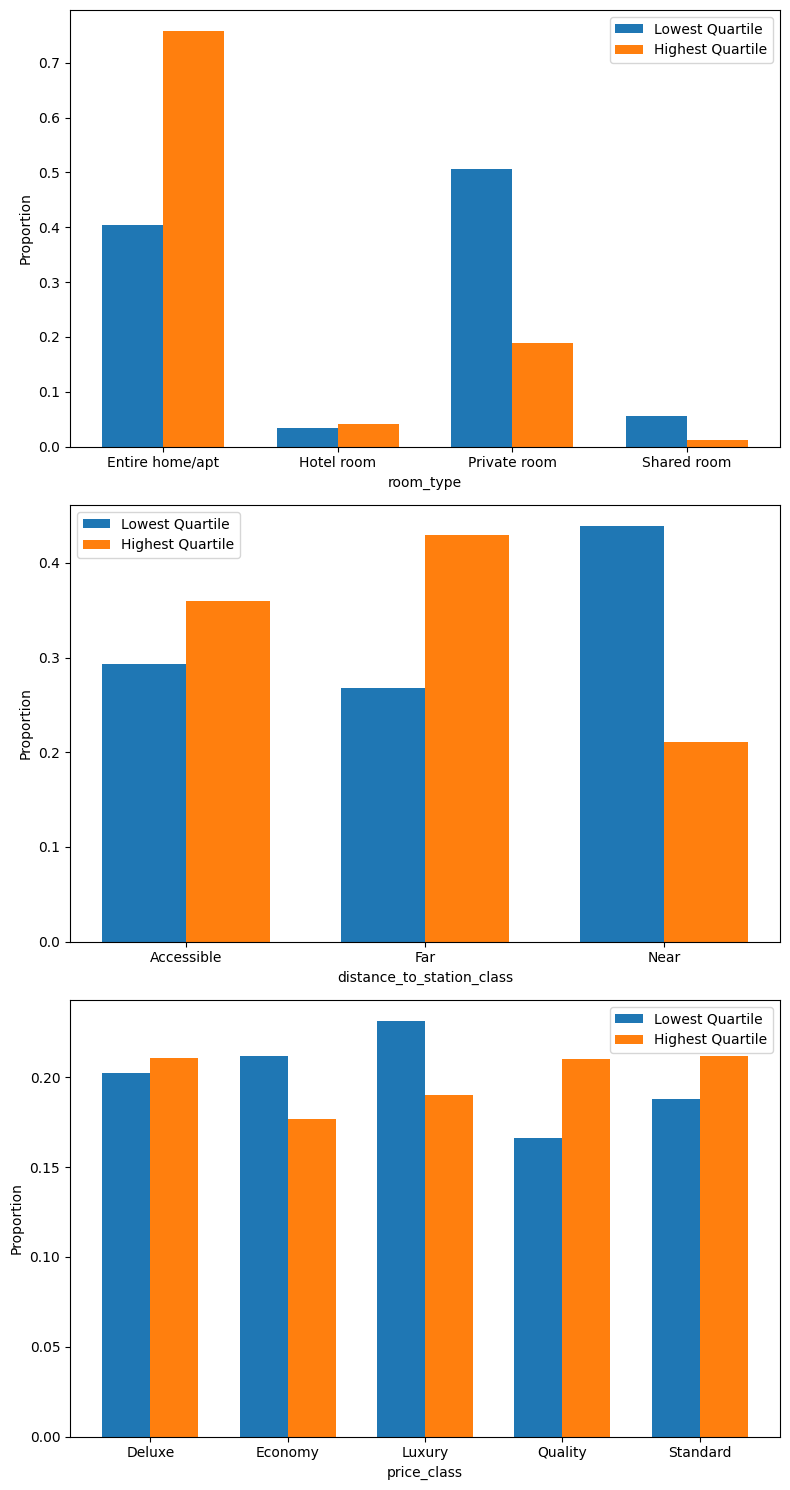

In [58]:
create_side_by_side_barplot(df,'number_of_reviews', ['room_type','distance_to_station_class', 'price_class'])

Findings: 
- Top 25% popular listings are dominated by entire house or apartment room type, compared to lowest 25% popular listings that are dominated by private room type
- Surprisingly top 25% listings are dominated by listings that are far, while lowest 25% popular listings that are dominated by listings that are near the station
- Lowest 25% popular listings are dominated by luxury price_class, while the highest 25% popular listings are in standard price_Class

> How do various listing attributes correlate with review counts?

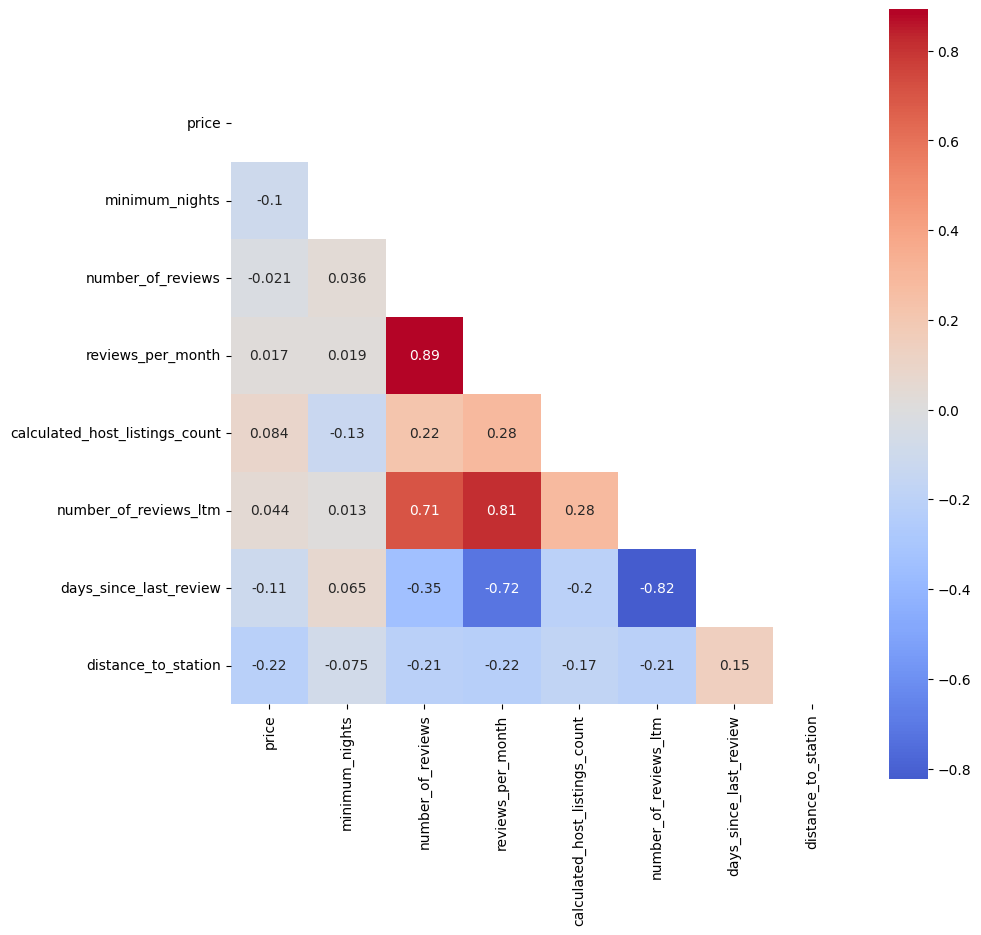

In [59]:
plt.figure(figsize=(10,10))

matrix = np.triu(df[numerical_columns].corr(method='spearman'))

sns.heatmap(data=df[numerical_columns].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

insights:
- From the heatmap we can conclude that the price feature does not have any strong correlation to other numerical features. This can be seen from the correlation coefficient that is closer to 0 than it is to 1 or -1. The same can be said to the minimum_nights column where it is found that there is no significant correlation between the column and other numerical columns.
- some of the stronger correlation can be seen from the `number_of_reviews`, `number_of_review_ltm`, `review_per_month` and `days_since_last_review` which should be noted because each column are multicolinear to each other
- The strongest correlation can be seen in the `calculated_host_listings_count` and `number_of_reviews_ltm` although it is not a strong correlation. But it is possible that the more listings that a host have, the more experienced they are in managing their listings and making them popular.

### **Q2**: Price Analysis

> What are the noticable patterns of other features that could correlate to pricing?

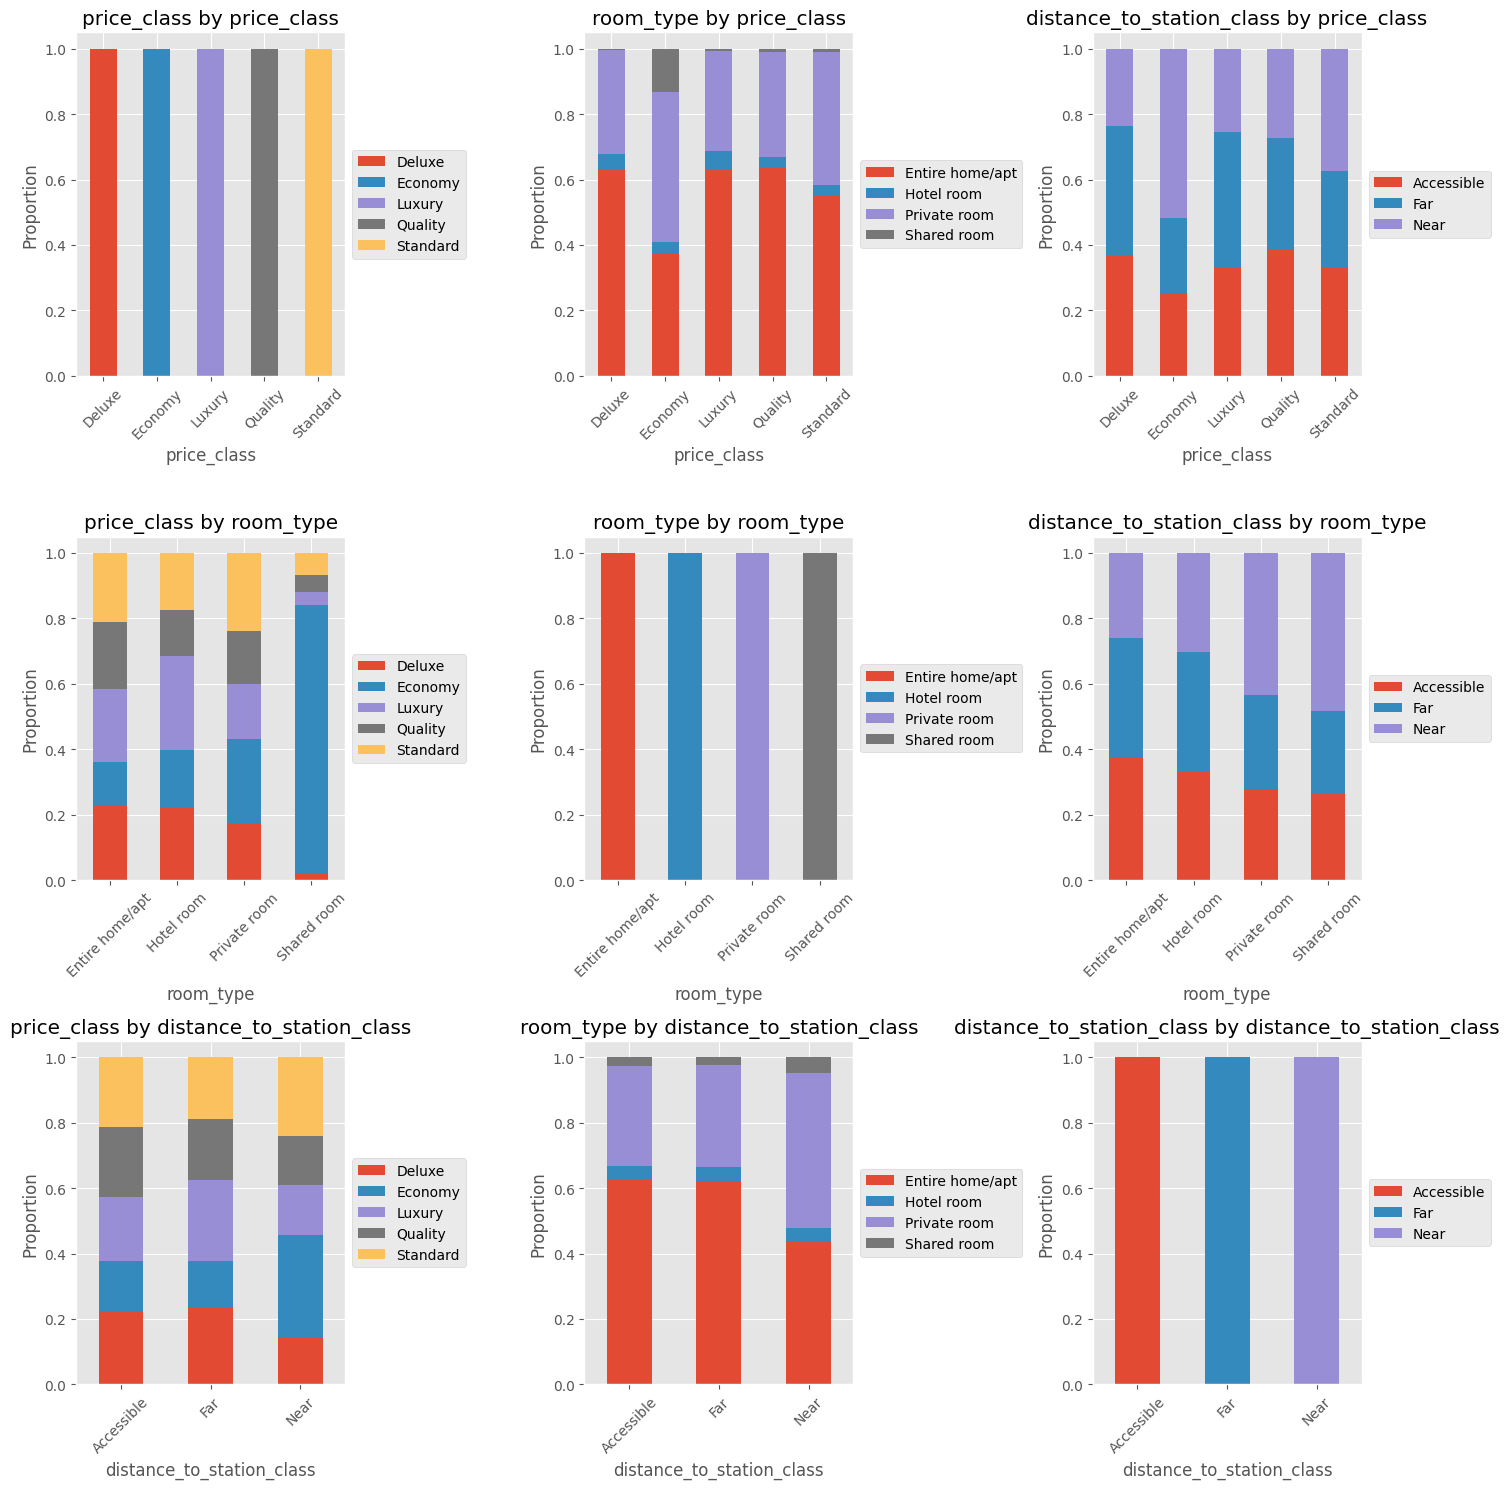

In [60]:
plt.style.use('ggplot')

plot_columns = ['price_class', 'room_type', 'distance_to_station_class']

num_plots = len(plot_columns)
fig, axs = plt.subplots(num_plots, len(plot_columns), figsize=(15, 15))

for i, column in enumerate(plot_columns):
    for j, other_column in enumerate(plot_columns):
        df_cross = pd.crosstab(df[column], df[other_column], normalize='index')
        
        df_cross.plot(kind='bar', stacked=True, ax=axs[i, j], legend=True)

        axs[i, j].set_title(f'{other_column} by {column}')
        axs[i, j].set_xlabel(column)
        axs[i, j].set_ylabel('Proportion')
        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45)
        
        axs[i, j].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


findings:
- The majority of`price_class` Economy are located near to the station and have a room_type of shared_room
- Most luxury price class are hotel rooms, just like the previous findings, tend to be far away from station
- A big proportion of `room_type` shared room are near the train station and are categorized into `price_class` economy

In [61]:
summarize_by_category(df, 'price_class', 'number_of_reviews').sort_values(['price_class'])

price_class  median       mean  min   max
0      Deluxe     2.0  16.943781    0   486
1     Economy     2.0  13.972939    0   426
2      Luxury     1.0  15.097398    0   402
3     Quality     3.0  19.810214    0  1224
4    Standard     2.0  17.675088    0   807

### **Q3**: Geographical Expansion Planning

#### Text analysis

source for stop words can be found here: https://gist.github.com/larsyencken/1440509

In [62]:
stop_words = pd.read_table('stopwords.txt', skiprows=6,header=None)
stop_words.rename(columns={0:'words'},inplace=True)
stop_words.reset_index(drop=True,inplace=True)
print('Number of rows: ', len(stop_words))
stop_words_list = stop_words['words'].tolist()


Number of rows:  429


In [63]:
all_names = ' '.join(df['name'])

words = all_names.split()
word_counts = Counter(words)
frequent_words = []

for word, count in word_counts.items():
    if not word.isalpha():
        continue
    elif word.lower() in stop_words_list:
        continue
    else: 
        frequent_words.append([word,count])
        
   
frequent_words_df = pd.DataFrame(frequent_words, columns=['word','count'])


In [64]:
frequent_words_df.to_csv('word count.csv')

In [65]:
from wordcloud import WordCloud

In [66]:
all_names = ' '.join(df[df['number_of_reviews']>df['number_of_reviews'].quantile(0.75)]['name'])

words = all_names.split()
word_counts = Counter(words)

frequent_words = []

for word, count in word_counts.items():
    if word.isalpha() == False:
        continue
    elif word.lower() in stop_words_list:
        continue
    else: 
        frequent_words.append([word,count])
        
frequent_words_top_quarter = pd.DataFrame(frequent_words, columns=['word','count'])
frequent_words_top_quarter.to_csv('word count top quarter reviews.csv')

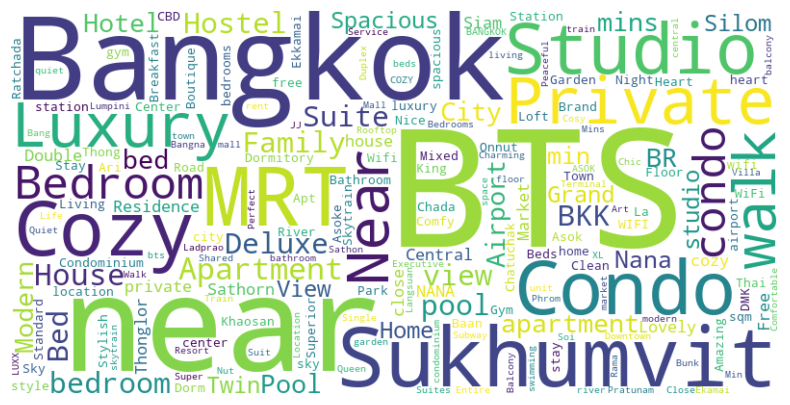

In [67]:
word_freq = dict(zip(frequent_words_df['word'], frequent_words_df['count']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

insights:
- some of the words with the highest count like `BTS, Bangkok, Sukhumvit, near` are usually the kind of words to describe place and distance
- this could mean that the top popular hosts wants the location of the listings

#### map analysis

> Where should hosts consider expanding their Airbnb business within Bangkok and similar cities?

In [68]:
from folium import plugins

geojson_station_line = r"C:\Users\Rahmani\Basic Python\Purwadhika\capstone_modul 2\capstone\BTS__MRT_-_Bangkok_Mass_Transit - Copy.geojson"
geojson_station_pin =r'C:\Users\Rahmani\Basic Python\Purwadhika\capstone_modul 2\capstone\BTS__MRT_-_Bangkok_Mass_Transit.geojson'
geojson_transit = r"C:\Users\Rahmani\Basic Python\Purwadhika\capstone_modul 2\capstone\Bangkok_Transit.geojson"


In [69]:
# def style_function(feature):
#     return {
#         'fillColor': 'blue',   # Color of the dot
#         'color': 'blue',       # Color of the border
#         'weight': 2,           # Border width
#         'fillOpacity': 0.6     # Opacity of the dot
#     }

In [70]:
reviews_qtr = df['number_of_reviews']
reviews_qtr_4 = df[(reviews_qtr<reviews_qtr.quantile(0.25))]
reviews_qtr_3 = df[(reviews_qtr<reviews_qtr.quantile(0.50))&(reviews_qtr>reviews_qtr.quantile(0.25))]
reviews_qtr_2 = df[(reviews_qtr<reviews_qtr.quantile(0.75))&(reviews_qtr>reviews_qtr.quantile(0.50))]
reviews_qtr_1 = df[(reviews_qtr>reviews_qtr.quantile(0.75))]

In [71]:

# def circle_marker(latitude,longitude, color, radius, opacity):
#     for lat, long in zip(latitude, longitude):
#         lat = float(lat)
#         long = float(long)

#         listings_spread.add_child(
#             folium.vector_layers.CircleMarker(
#                 [lat, long],
#                 radius=radius,
#                 fill=True,
#                 fill_color=color,
#                 fill_opacity=opacity
#             )
#         )

In [72]:
# coordinates = [13.736717, 100.523186]
# suvarnabhumi_airport_coor= [13.692433573854405, 100.75080002579622]
# donmueang_airport_coor= [13.920009324093558, 100.60193039511478]

# bts_skytrain = [13.77585100076097, 100.5431874804014]
# mrt = [13.760500598590022, 100.56614072371309]
# m = folium.Map(location=coordinates, zoom_start=11)
# folium.TileLayer(tiles='http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}', attr='Esri').add_to(m)


# listings_spread = folium.map.FeatureGroup()


# for lat, long in zip(df['latitude'], df['longitude']):
#     lat = float(lat)
#     long = float(long) 

#     listings_spread.add_child(
#         folium.vector_layers.CircleMarker(
#             [lat, long],
#             radius=2,
#             fill=True,
#             fill_color='orange',
#             fill_opacity=0.2
#         )
#     )


# donmueang_airport_pin = folium.Marker(
#     location= donmueang_airport_coor,
#     tooltip = 'Don Mueang Airport',
#     popup= 'International Don Mueang Airport',
#     icon=folium.Icon(
#         icon='plane',
#         prefix='fa',
#         color='red')
# )

# suvarnabhumi_airport_pin = folium.Marker(
#     location= suvarnabhumi_airport_coor,
#     tooltip = 'Suvarnabhumi Airport',
#     popup= 'International Suvarnabhumi Airport',
#     icon=folium.Icon(
#         icon='plane',
#         prefix='fa',
#         color='red')
# )

# m.add_child(listings_spread)
# suvarnabhumi_airport_pin.add_to(m)
# donmueang_airport_pin.add_to(m)

# folium.GeoJson(geojson_transit, 
#                name="GeoJSON Layer", 
#                style_function=style_function).add_to(m)


# folium.GeoJson(geojson_station_line, 
#                name="GeoJSON Layer", 
#                color='black').add_to(m)


# folium.GeoJson(geojson_station_pin, 
#                name="GeoJSON Layer", 
#                marker=folium.Circle(radius=4, fill_opacity=0.4, color="red", weight=3)).add_to(m)


# folium.LayerControl().add_to(m)


# m


In [73]:
df[df['price_class']=='Economy']['latitude']

2        13.752320
9        13.720400
31       13.789380
45       13.821480
60       13.678050
           ...    
15832    13.754217
15836    13.754710
15837    13.754210
15838    13.755000
15842    13.797467
Name: latitude, Length: 3215, dtype: float64

In [74]:
coordinates = [13.736717, 100.523186]
suvarnabhumi_airport_coor= [13.692433573854405, 100.75080002579622]
donmueang_airport_coor= [13.920009324093558, 100.60193039511478]

bts_skytrain = [13.77585100076097, 100.5431874804014]
mrt = [13.760500598590022, 100.56614072371309]
m = folium.Map(location=coordinates, zoom_start=11)
folium.TileLayer(tiles='http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}', attr='Esri').add_to(m)


listings_spread = folium.map.FeatureGroup()


for lat, long in zip(df[df['price_class']=='Economy']['latitude'], df[df['price_class']=='Economy']['longitude']):
    lat = float(lat)
    long = float(long) 

    listings_spread.add_child(
        folium.vector_layers.CircleMarker(
            [lat, long],
            radius=2,
            fill=True,
            fill_color='yellow',
            fill_opacity=0.5
        )
    )
    
for lat, long in zip(df[df['price_class']=='Quality']['latitude'], df[df['price_class']=='Quality']['longitude']):
    lat = float(lat)
    long = float(long) 

    listings_spread.add_child(
        folium.vector_layers.CircleMarker(
            [lat, long],
            radius=2,
            fill=True,
            fill_color='green',
            fill_opacity=0.5
        )
    )

for lat, long in zip(df[df['price_class']=='Luxury']['latitude'], df[df['price_class']=='Luxury']['longitude']):
    lat = float(lat)
    long = float(long) 

    listings_spread.add_child(
        folium.vector_layers.CircleMarker(
            [lat, long],
            radius=2,
            fill=True,
            fill_color='blue',
            fill_opacity=0.5
        )
    )

donmueang_airport_pin = folium.Marker(
    location= donmueang_airport_coor,
    tooltip = 'Don Mueang Airport',
    popup= 'International Don Mueang Airport',
    icon=folium.Icon(
        icon='plane',
        prefix='fa',
        color='red')
)

suvarnabhumi_airport_pin = folium.Marker(
    location= suvarnabhumi_airport_coor,
    tooltip = 'Suvarnabhumi Airport',
    popup= 'International Suvarnabhumi Airport',
    icon=folium.Icon(
        icon='plane',
        prefix='fa',
        color='red')
)

m.add_child(listings_spread)
suvarnabhumi_airport_pin.add_to(m)
donmueang_airport_pin.add_to(m)

folium.GeoJson(geojson_transit, 
               name="GeoJSON Layer").add_to(m)


folium.GeoJson(geojson_station_line, 
               name="GeoJSON Layer", 
               color='black').add_to(m)


folium.GeoJson(geojson_station_pin, 
               name="GeoJSON Layer", 
               marker=folium.Circle(radius=4, fill_opacity=0.4, color="red", weight=3)).add_to(m)


folium.LayerControl().add_to(m)


m


insights:
- Based on the map it is evident to see that the listings are crowding around the BTS skytrain and MRT track, this could further be a sign that public transportation do have an impact to how people choose their stay.
- The observation drawn from the map reveals a notable clustering of listings around the BTS Skytrain and MRT tracks in Bangkok. This clustering phenomenon suggests a strong correlation between the proximity of accommodations to public transportation hubs and the selection of lodging by guests.

# Conclusion

- Through Chi-squared tests, we found significant associations between pairs of categorical variables, indicating dependencies among these variables.
- Top 25% popular listings are predominantly entire houses or apartments, while the lowest 25% popular listings tend to be private rooms.
- Surprisingly, top 25% popular listings are farther from stations, while the lowest 25% popular listings are closer.
- Luxury price class dominates the lowest 25% popular listings, while standard price class dominates the highest 25% popular listings.
- Price and minimum nights do not show strong correlations with other numerical features, while some multicollinearity exists between columns such as number of reviews, review per month, and days since last review.
- The strongest correlation is observed between calculated host listings count and number of reviews last twelve months, suggesting that more experienced hosts may have more popular listings.
- Economy price class listings are typically located near stations and are mostly shared rooms.
- Luxury price class listings, resembling hotel rooms, are often farther from stations.
- A significant proportion of shared room listings are near train stations and categorized into the economy price class.
- Words like "BTS," "Bangkok," "Sukhumvit," and "near" are frequently used by popular hosts, indicating a focus on location and distance, which aligns with the importance of these factors for guests.

Based on the previous analysis, it is evident that each price class yields distinct findings. For instance, lower-priced listings are more likely to be situated near transit stations, while higher-priced listings tend to be farther away. This finding is surprising, as it contradicts the common assumption that high-end Airbnb listings would be located near stations. It suggests that luxury listings may not necessarily prioritize proximity to stations, possibly because their guests may have their own vehicles or prefer renting transportation instead of relying on public transit. Therefore, understanding your target customer is crucial in deciding whether to prioritize strategic location or amenities.

Overall, these insights and findings provide valuable information for both hosts and guests in the Bangkok Airbnb market. Hosts can leverage the factors contributing to listing popularity, while guests can make informed decisions based on location, price class, and room type preferences. Further analysis and refinement of strategies based on these insights could lead to improved listing performance and guest satisfaction.

# Recommendation

Recommendations for Airbnb Hosts:

1. **Optimize Listing's Location on Names and Description**:
    - Utilize popular keywords such as "BTS," "Bangkok," "Sukhumvit," and "near" in your listing descriptions to attract potential guests who prioritize location and convenience.
    - The distribution of the listings also suggests that including location-related terms can effectively communicate your listing's proximity to transit stations, which may appeal to guests seeking convenient transportation options.
    - The concentration of listings around these transit networks indicates that guests may prioritize accessibility and convenience when choosing their accommodation. The availability of efficient public transportation options like the BTS Skytrain and MRT likely influences guests' decision-making processes regarding where to stay during their visit to Bangkok.

2. **Optimize Pricing Strategy by Prioritizing Certain Groups**:
    - Consider the insights from the analysis of different price classes. For instance, lower-priced listings are more likely to be located near transit stations, while higher-priced listings tend to be farther away.
    - Recognize that the preferences of guests vary based on price class; while guests of luxury listings may prioritize amenities and exclusivity over proximity to transit stations, budget-conscious travelers may value convenience and accessibility.
    - Tailor your pricing strategy to cater to the preferences of your target customer base. Understanding your guests' priorities will help you determine whether to emphasize strategic location or premium facilities in your listings.